In [1]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("malicious_url.csv")
df.head()

# Randomly sample 10% of the dataset 
df_sample = df.head(1000) 

In [3]:
def extract_features(url):

    feature = {}

    # URL Length
    feature['url_length'] = len(url)

    # Count Special Character
    feature['num_special_chars'] = sum(1 for c in url if c in['?', '=', '&', '%', '@', '-', '_'])

    # Count Digits
    feature['num_digit'] = sum(c.isdigit() for c in url)

    # Count subdomains (number of dots in URL)
    feature['num_subdomains'] = url.count('.')

    # Check if https is present
    feature['https_present'] = 1 if url.startswith("https") else 0

    # Extract domain & path 
    parsed_url = urlparse(url)
    # feature['domain'] = parsed_url.netloc # Extract domain
    feature['path_length'] = len(parsed_url.path) # Path length
    feature['num_path_segments'] = parsed_url.path.count('/') # Count path segments

    # Check if the URL contains an IP address
    feature['contains_ip'] = 2 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0

    return feature

In [4]:
# Apply feature extraction to all URLs
features_df = df_sample['url'].apply(lambda x: extract_features(x)).apply(pd.Series)

# Merge extracted features with the sampled dataset
df_sample = pd.concat([df_sample, features_df], axis=1)

# Drop the 'url' column from df_sample
df_sample = df_sample.drop(columns=['url'])

# Save the cleaned sampled dataset
df_sample.to_csv("sample_malicious_url.csv", index=False)

# Display the first few rows of the cleaned dataset
df_sample.head()


,type,url_length,num_special_chars,num_digit,num_subdomains,https_present,path_length,num_path_segments,contains_ip
0,phishing,16,1,0,2,0,16,0,0
1,benign,35,1,1,2,0,35,2,0
2,benign,31,0,1,2,0,31,3,0
3,defacement,88,11,7,3,0,10,1,0
4,defacement,235,8,22,2,0,10,1,0


In [5]:
df = pd.read_csv("sample_malicious_url.csv")
# df.head()

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sample['type'])

In [7]:
# Exclude the target column
features = [x for x in df_sample.columns if x != 'type']  # Exclude 'type' column
print(len(features))

8


In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_sample[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 800
validation samples: 200
target proportion: 0.4012


In [9]:
# Building decision tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

min_samples_split=2, Train Accuracy=0.9988, Validation Accuracy=0.9000
min_samples_split=10, Train Accuracy=0.9550, Validation Accuracy=0.9100
min_samples_split=30, Train Accuracy=0.9175, Validation Accuracy=0.8900
min_samples_split=50, Train Accuracy=0.9025, Validation Accuracy=0.8800
min_samples_split=100, Train Accuracy=0.8850, Validation Accuracy=0.8700
min_samples_split=200, Train Accuracy=0.8375, Validation Accuracy=0.7900
min_samples_split=300, Train Accuracy=0.8375, Validation Accuracy=0.7900
min_samples_split=700, Train Accuracy=0.7913, Validation Accuracy=0.7500


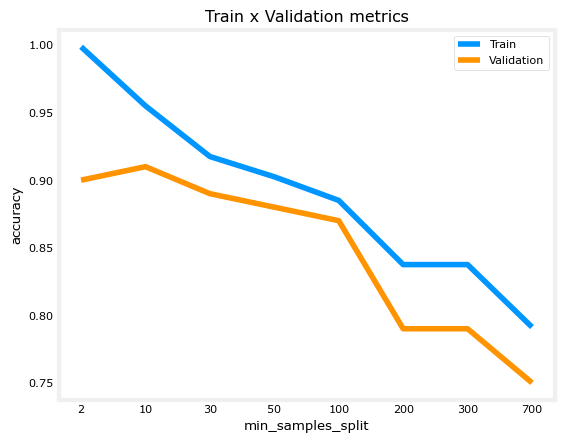

In [10]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.7913, Validation Accuracy=0.7500
max_depth=2, Train Accuracy=0.8712, Validation Accuracy=0.8450
max_depth=3, Train Accuracy=0.8762, Validation Accuracy=0.8450
max_depth=4, Train Accuracy=0.9087, Validation Accuracy=0.8800
max_depth=8, Train Accuracy=0.9613, Validation Accuracy=0.9100
max_depth=16, Train Accuracy=0.9988, Validation Accuracy=0.9000
max_depth=32, Train Accuracy=0.9988, Validation Accuracy=0.9000
max_depth=64, Train Accuracy=0.9988, Validation Accuracy=0.9000
max_depth=None, Train Accuracy=0.9988, Validation Accuracy=0.9000


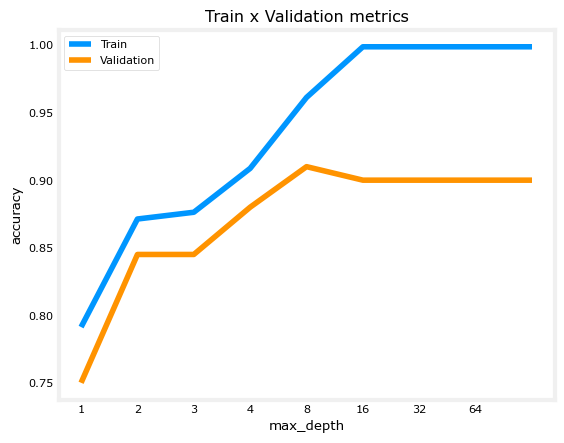

In [11]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

In [12]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 10,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [13]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9450
Metrics validation:
	Accuracy score: 0.9050
